# Important functions for 

In [7]:
import pandas as pd

In [8]:
import numpy as np 

In [9]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [10]:
Data = pandas.read_csv("1. Regression - Module - (Housing Prices).csv")

In [11]:
Data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [12]:
import matplotlib.pyplot as plb

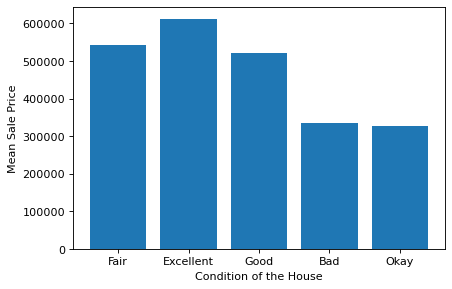

In [13]:
#Initialising a new column
Data['condition_sale'] = 0

#Calculating Mean
for i in Data['Condition of the House'].unique():
    Data['condition_sale'][Data['Condition of the House'] == str(i)] =  Data['Sale Price'][Data['Condition of the House'] == str(i)].mean()
    
#Graph Plot
plb.figure( dpi = 80)
plb.bar(Data['Condition of the House'].unique(), Data['condition_sale'].unique())
plb.xlabel("Condition of the House")
plb.ylabel("Mean Sale Price")
plb.show()

In [14]:
Data['zip_condition_sale'] = 0

C = 'Condition of the House'
Z = 'Zipcode'
for i in Data[C].unique():
    for j in Data[Z].unique():
          Data['zip_condition_sale'][(Data[C] == str(i)) & (Data[Z] == j)] =  Data['Sale Price'][(Data[C] == str(i)) & (Data[Z] == j)].mean()
    
len(Data['zip_condition_sale'].unique())
        

281

## groupby fucntion

In [15]:
zip_condition_sale = Data.groupby(['Condition of the House', 'Zipcode'])['Sale Price'].mean()
zip_condition_sale

Condition of the House  Zipcode
Bad                     98004.0    1.500000e+06
                        98006.0    3.725000e+05
                        98011.0    2.700000e+05
                        98023.0    1.500000e+05
                        98024.0    1.420000e+05
                                       ...     
Okay                    98155.0    3.601833e+05
                        98166.0    2.165625e+05
                        98168.0    1.809389e+05
                        98178.0    1.750000e+05
                        98198.0    2.705325e+05
Name: Sale Price, Length: 283, dtype: float64

## pivot function

In [16]:
zip_condition_sale3 = pd.pivot_table(Data, index=["Condition of the House", "Zipcode"], values = ["Sale Price"], aggfunc=np.mean)
zip_condition_sale3

Sale Price
Condition of the House Zipcode              
Bad                    98004.0  1.500000e+06
                       98006.0  3.725000e+05
                       98011.0  2.700000e+05
                       98023.0  1.500000e+05
                       98024.0  1.420000e+05
...                                      ...
Okay                   98155.0  3.601833e+05
                       98166.0  2.165625e+05
                       98168.0  1.809389e+05
                       98178.0  1.750000e+05
                       98198.0  2.705325e+05

[283 rows x 1 columns]

In [17]:
zip_condition_sale3 = pd.pivot_table(Data, index=["Zipcode"], columns=['Condition of the House'], values = ["Sale Price"], aggfunc=np.mean)
zip_condition_sale3

Sale Price                                            \
Condition of the House        Bad     Excellent          Fair          Good   
Zipcode                                                                       
98001.0                       NaN  2.425433e+05  2.927207e+05  2.527446e+05   
98002.0                       NaN  2.216411e+05  2.588868e+05  2.192858e+05   
98003.0                       NaN  3.706800e+05  2.992801e+05  2.809591e+05   
98004.0                 1500000.0  1.236365e+06  1.527265e+06  1.145915e+06   
98005.0                       NaN  8.319500e+05  8.668012e+05  7.669397e+05   
...                           ...           ...           ...           ...   
98177.0                       NaN  8.966313e+05  6.496812e+05  6.665755e+05   
98178.0                       NaN  2.975217e+05  3.094105e+05  3.308419e+05   
98188.0                       NaN  2.853636e+05  2.900059e+05  2.867413e+05   
98198.0                       NaN  3.215235e+05  2.941619e+05  3.154305e+05   
98199.0                       NaN  9.338983e+05  7.604974e+05  7.963811e+05   

                                  
Condition of the House      Okay  
Zipcode                           
98001.0                 356070.0  
98002.0                      NaN  
98003.0                 235500.0  
98004.0                 425000.0  
98005.0                 577750.0  
...                          ...  
98177.0                      NaN  
98178.0                 175000.0  
98188.0                      NaN  
98198.0                 270532.5  
98199.0                      NaN  

[70 rows x 5 columns]

In [18]:
Data['plot_length'] = Data['Flat Area (in Sqft)']**0.5
Data['plot_length']

0        34.351128
1        50.695167
2        27.748874
3        44.271887
4        40.987803
           ...    
21608    39.115214
21609    48.062459
21610    31.937439
21611    40.000000
21612    31.937439
Name: plot_length, Length: 21613, dtype: float64

## map function

In [19]:
Data['Condition of the House'][Data['Condition of the House'] == 'Fair'] = '1'
Data['Condition of the House'][Data['Condition of the House'] == 'Okay'] = '0'
Data['Condition of the House'][Data['Condition of the House'] == 'Bad'] = '0'
Data['Condition of the House'][Data['Condition of the House'] == 'Good'] = '1'
Data['Condition of the House'][Data['Condition of the House'] == 'Excellent'] = '3'
Data['Condition of the House'].unique()

array(['1', '3', '0'], dtype=object)

In [20]:
Data['Condition of the House'] = Data['Condition of the House'].map({'Good':'1', 
                                                                     'Excellent':'3', 
                                                                     'Bad':'0', 
                                                                     'Fair':'1',
                                                                     'Okay':'0'})
Data['Condition of the House'].unique()

array([nan], dtype=object)

In [21]:
month = []
for i in range(len(Data['Date House was Sold'])):
    k = Data['Date House was Sold'][i].split()[+1]
    month.append(k)

Data['month_sold'] = month
Data['month_sold'].head(8)

0     October
1    December
2    February
3    December
4    February
5         May
6        June
7     January
Name: month_sold, dtype: object

In [22]:
def year(value):
    return value.split()[+1]

Data['month_sold'] = Data['Date House was Sold'].map(year)
Data['month_sold'].head(8)
    

0     October
1    December
2    February
3    December
4    February
5         May
6        June
7     January
Name: month_sold, dtype: object

In [25]:
Data['luxury_house'] = 0

for i in range(len(Data)):
    count = 0
    if Data['Waterfront View'][i] == 'Yes':
        count = count + 1
    if Data['Condition of the House'][i] in ['Good', 'Excellent']:
        count = count + 1
    if Data['Overall Grade'][i] >= 8:
        count = count + 1
    if count >= 2:
        Data['luxury_house'][i] = 'Yes'
    else:
        Data['luxury_house'][i] = 'No'
        
Data['luxury_house'].unique()


array(['No', 'Yes'], dtype=object)

## apply function 

In [26]:
def luxury_house(row):
    count = 0 
    if row[0] == 'Yes':
        count = count + 1
    if row[1] in ['Good', 'Excellent']:
        count = count + 1
    if row[2] >= 8:
        count = count + 1
    if count >= 2:
        return 'Yes'
    else:
        return 'No'
    
Data['luxury_'] = Data[['Waterfront View', 'Condition of the House', 'Overall Grade']].apply(luxury_house, axis =1)
Data['luxury_house'].unique()

array(['No', 'Yes'], dtype=object)